In [1]:
import xfirst

Welcome to JupyROOT 6.28/04


2023-07-13 15:22:53.233920: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Configure

In [2]:
datadir = 'data'
nshowers = 10000

# cut configuration
cut = xfirst.config.cut.A2

# features
x = xfirst.profile_functions.usp().parameter_names

# target
y = 'Xfirst'

### Load data

In [3]:
data = xfirst.data.load_fits(
  datadir = datadir,
  cut = cut,
  columns = x,
  xfirst = True,
  norm = x,
  drop_bad = {'train': True, 'validation': True, 'test': False},
  nshowers = nshowers,
)

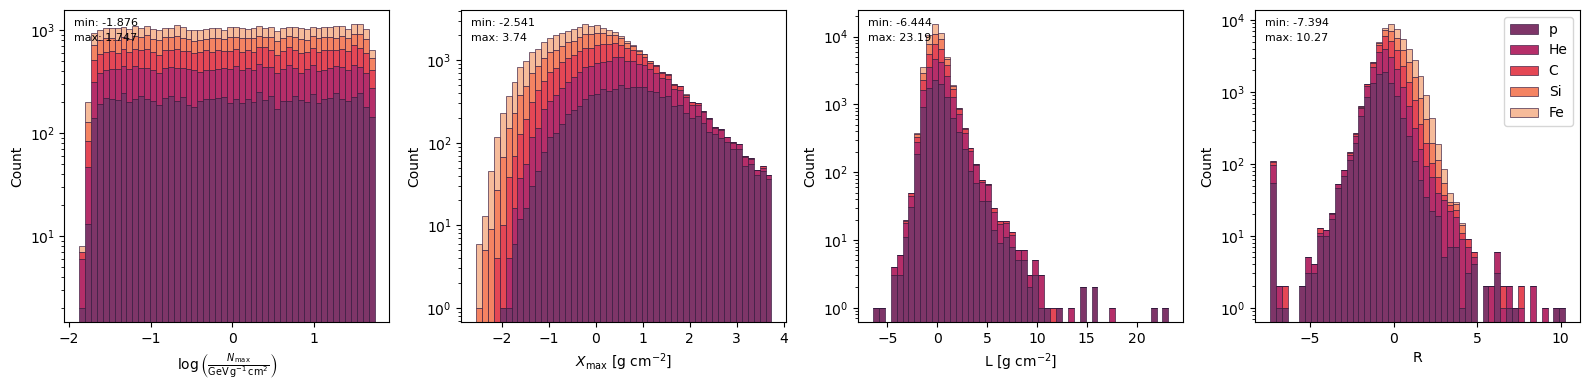

In [4]:
f = xfirst.viz.draw_fit_parameters(data['train'], stat = False, logy = True)

### Train the gradient boosting regressor

In [5]:
regressor = xfirst.models.gradient_boosting_regressor().fit(data, x, y)

+ training the model on ['lgNmax', 'Xmax', 'L', 'R'] for target Xfirst
[0]	validation_0-rmse:27.00759	validation_1-rmse:27.00755
[1]	validation_0-rmse:21.95260	validation_1-rmse:22.10266
[2]	validation_0-rmse:18.73382	validation_1-rmse:19.01163
[3]	validation_0-rmse:16.72383	validation_1-rmse:17.16882
[4]	validation_0-rmse:15.47218	validation_1-rmse:16.05122
[5]	validation_0-rmse:14.69467	validation_1-rmse:15.37793
[6]	validation_0-rmse:14.14089	validation_1-rmse:14.90652
[7]	validation_0-rmse:13.76874	validation_1-rmse:14.59300
[8]	validation_0-rmse:13.52580	validation_1-rmse:14.39667
[9]	validation_0-rmse:13.35822	validation_1-rmse:14.27925
[10]	validation_0-rmse:13.22620	validation_1-rmse:14.18940
[11]	validation_0-rmse:13.11691	validation_1-rmse:14.11858
[12]	validation_0-rmse:13.03620	validation_1-rmse:14.06579
[13]	validation_0-rmse:12.96489	validation_1-rmse:14.02141
[14]	validation_0-rmse:12.90639	validation_1-rmse:13.98870
[15]	validation_0-rmse:12.86388	validation_1-rmse:13.9

### Validation curve

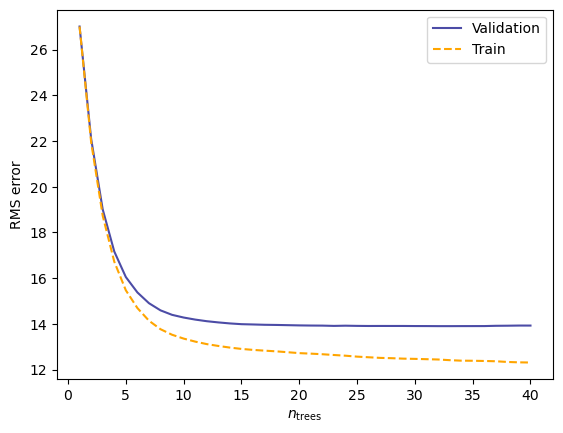

In [6]:
fig = regressor.draw()

### Compute predictions

+ computing predictions
+ drawing predictions


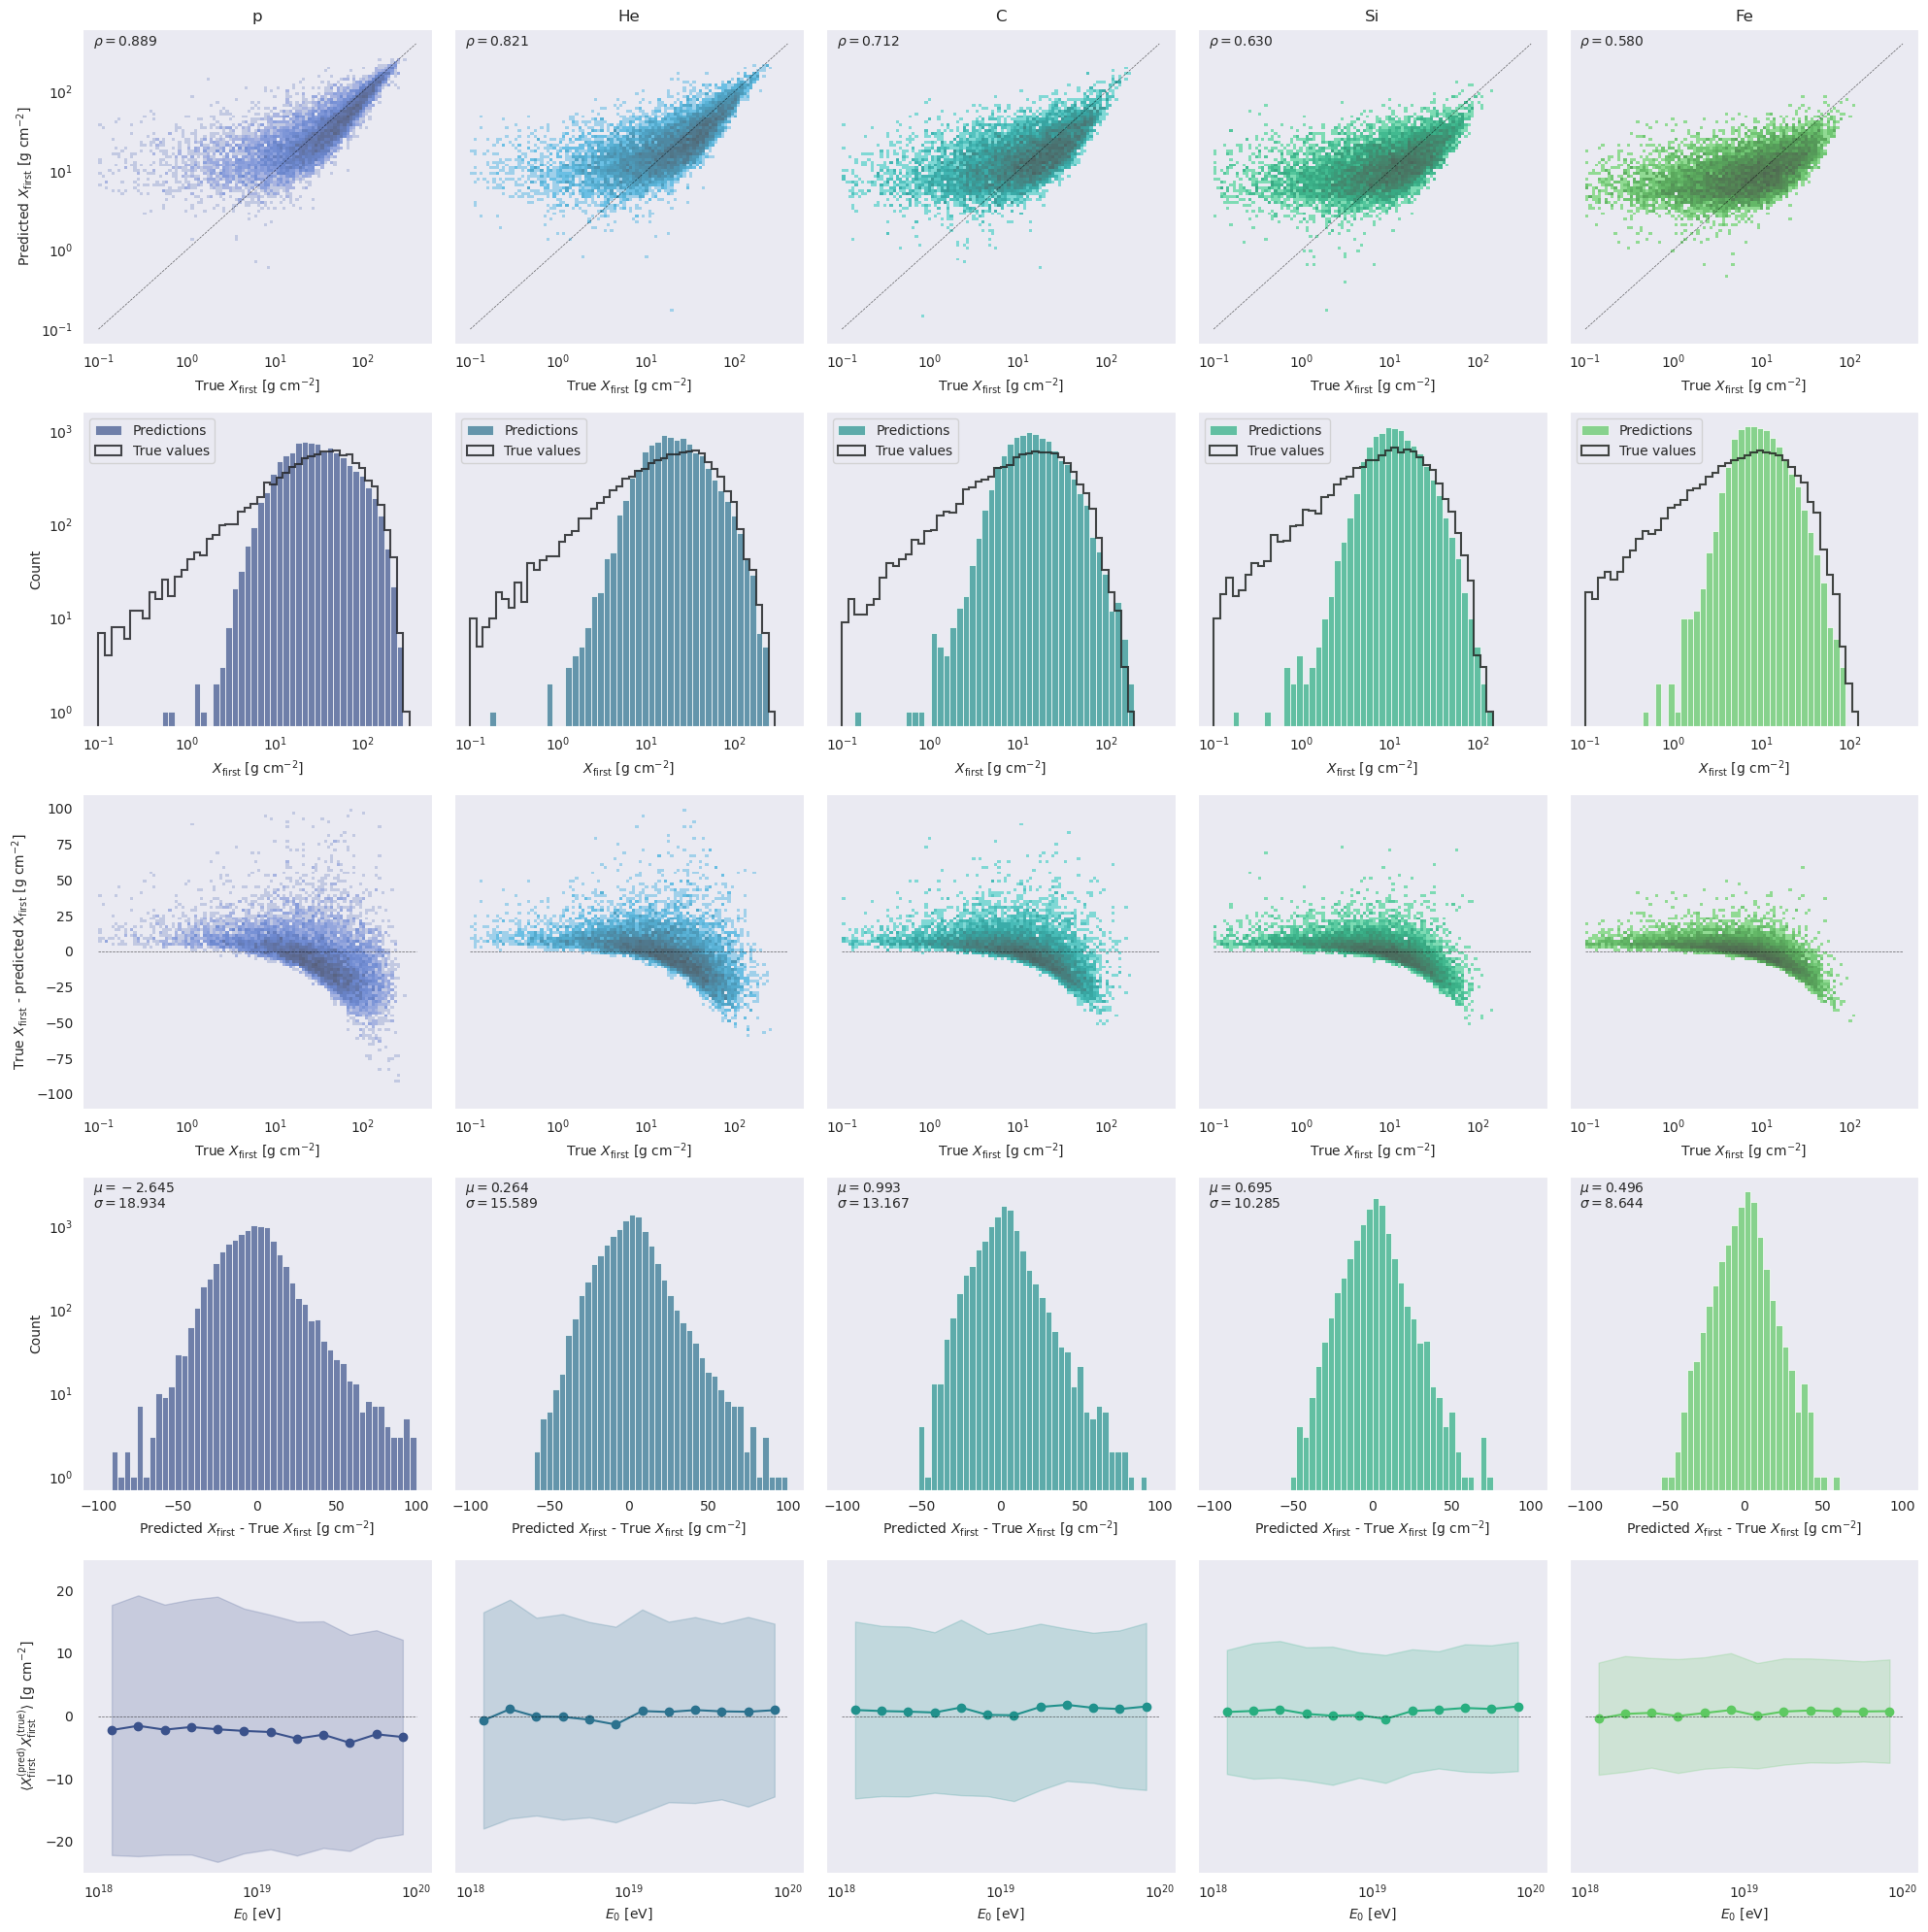

In [122]:
results = regressor.eval(data, plot = True)